In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Adding channel dimension to fufil the requirements of Conv2D
X_train = tf.expand_dims(X_train, -1)
X_test = tf.expand_dims(X_test, -1)

'''
 Apply Padding to convert (28, 28) image into (32, 32)
 as per LeNET architecture requirement.
'''
X_train = tf.pad(X_train, [[0, 0], [2, 2], [2, 2], [0, 0]], mode='CONSTANT')
X_test = tf.pad(X_test, [[0, 0], [2, 2], [2, 2], [0, 0]], mode='CONSTANT')

# Normalizing the data
X_train = tf.cast(X_train, tf.float32) / 255.0
X_test = tf.cast(X_test, tf.float32) / 255.0

# **LeNet Architecture**

In [ ]:
#LeNET base Arcitecture
#Tanh over Relu?: In base model tanh was used as an activation function
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),padding='valid',  activation='tanh', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(16, kernel_size=(5, 5),padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))# for multiclass classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.8754 - loss: 0.4101 - val_accuracy: 0.9638 - val_loss: 0.1221
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 22ms/step - accuracy: 0.9709 - loss: 0.0959 - val_accuracy: 0.9791 - val_loss: 0.0687
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9817 - loss: 0.0608 - val_accuracy: 0.9810 - val_loss: 0.0599
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9869 - loss: 0.0436 - val_accuracy: 0.9835 - val_loss: 0.0499
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9895 - loss: 0.0336 - val_accuracy: 0.9845 - val_loss: 0.0483
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9830 - val_loss: 0.0591
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9928 - loss: 0.0236 - val_accuracy: 0.9825 - val_loss: 0.0622
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9934 -

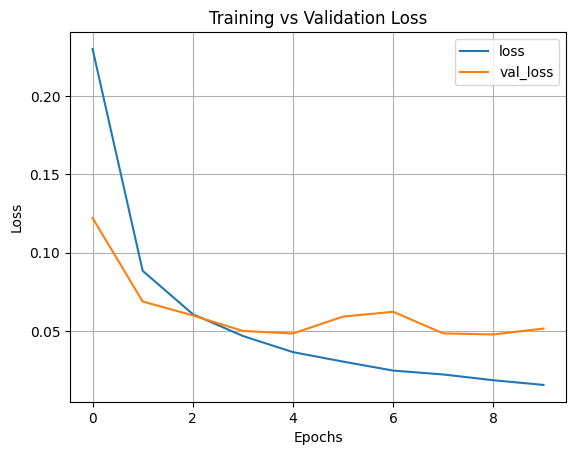

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

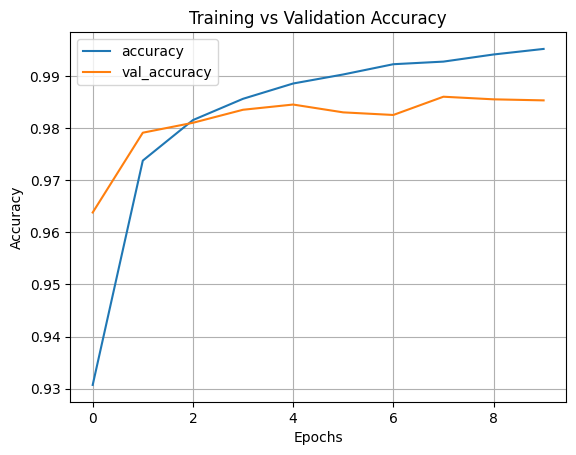

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### **Name** - Shabd Pathak
#####    B.tech. CSE